# Polynomial Approximation with Point Values

In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let's fix a function to approximate:

In [5]:
if 1:
    def f(x):
        return np.exp(1.5*x)
elif 0:
    def f(x):
        return np.sin(20*x)
else:
    def f(x):
        return (x>=0.5).astype(np.int).astype(np.float)
    

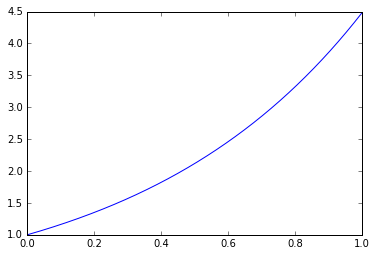

In [6]:
x_01 = np.linspace(0, 1, 1000)
pt.plot(x_01, f(x_01))

And let's fix some parameters. Note we are only using the interval $[0.5-h/2,0.5+h/2]$, not $[0,1]$!

In [7]:
degree = 1
h = 1

nodes = 0.5 + np.linspace(-h/2, h/2, degree+1)
nodes

array([ 0.,  1.])

Now build the Vandermonde matrix:

In [9]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

In [10]:
V

array([[ 1.,  0.],
       [ 1.,  1.]])

Now find the interpolation coefficients as `coeffs`:

In [11]:
coeffs = la.solve(V, f(nodes))

Here are some points. Evaluate the approximating function (the "**interpolant**") there:

In [14]:
x_0h = 0.5+np.linspace(-h/2, h/2, 1000)

In [16]:
interp_0h = 0*x_0h
for i in range(degree+1):
    interp_0h += coeffs[i] * x_0h**i

Now plot the interpolant with the function:

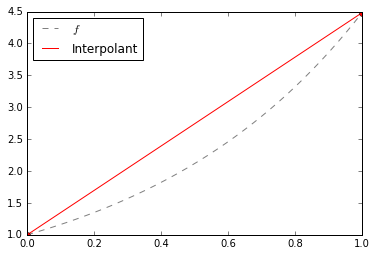

In [17]:
pt.plot(x_01, f(x_01), "--", color="gray", label="$f$")
pt.plot(x_0h, interp_0h, color="red", label="Interpolant")
pt.plot(nodes, f(nodes), "or")
pt.legend(loc="best")

Also plot the error:

Max error: 0.633384


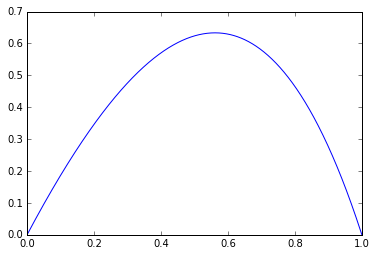

In [18]:
error = interp_0h - f(x_0h)

pt.plot(x_0h, error)

print("Max error: %g" % np.max(np.abs(error)))

* What does the error look like? (Approximately)
* How will the error react if we shrink the interval?
* What will happen if we increase the polynomial degree?